In [1]:
from pandas import DataFrame, concat
from pandas import read_csv
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

/home/sudaraka/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
dataset = read_csv('with_timestamp.csv', header=0, index_col=0)
dataset.drop(["@timestamp", "anomaly"], axis=1, inplace=True)
dataset.head()

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,jolokia.metrics.threading.thread_count,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
0,3.5818,0.0474,0.0312,0.1058,0.4182,0.2338,0.698,12.601,0.165,0.0,...,995,0.68,0.97,1.00,0.170,0.243,0.250,0.6904,0.0,0.9620
1,3.5080,0.0934,0.0271,0.1054,0.4920,0.2661,0.572,11.104,0.137,0.0,...,995,0.58,0.96,0.97,0.145,0.240,0.243,0.6903,0.0,0.9626
2,3.5337,0.1136,0.0291,0.1025,0.4663,0.2211,0.572,11.104,0.137,0.0,...,995,0.65,0.96,0.97,0.163,0.240,0.243,0.6904,0.0,0.9628
3,3.5742,0.0503,0.0201,0.0916,0.4258,0.2637,0.572,11.104,0.137,0.0,...,995,0.68,0.95,0.95,0.170,0.238,0.238,0.6903,0.0,0.9635
4,3.5454,0.0705,0.0268,0.1051,0.4546,0.2522,0.572,11.104,0.137,0.0,...,995,0.68,0.95,0.95,0.170,0.238,0.238,0.6905,0.0,0.9638


## Set Multiple Model Parameters

In [3]:
model_epoches = 200
model_batch_size = 200

## Normalizing Data

In [4]:
dataset[dataset.columns] = StandardScaler().fit_transform(dataset)

## Shifting the dataset
shifting only one minute

In [5]:
dataset_shifted = dataset.shift(6)
dataset = dataset.iloc[6:]
dataset_shifted = dataset_shifted.iloc[6:]

## Spliting the dataset 
Ratio - 80 : 20

In [6]:
train = dataset.shape[0] * 2 // 10
    
train_dataset = dataset.iloc[:-train]
train_dataset_shifted = dataset_shifted.iloc[:-train]

test_dataset = dataset.iloc[-train:]
test_dataset_shifted = dataset_shifted.iloc[-train:]

In [13]:
test_dataset_shifted

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,jolokia.metrics.threading.thread_count,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
40002,0.265665,-0.205125,0.389681,-0.615963,-0.265665,-0.195140,-0.006025,-0.175144,0.080114,-0.036651,...,-0.486940,-0.122516,-0.111771,-0.103817,-0.124852,-0.114648,-0.106327,-0.148286,-0.078425,0.209073
40003,0.211762,-0.128181,0.736578,0.287957,-0.211762,-0.183211,-0.006025,-0.175144,0.080114,-0.036651,...,-0.486940,-0.123067,-0.111771,-0.103817,-0.125513,-0.114648,-0.106327,-0.143816,-0.078425,0.216463
40004,0.220043,-0.179477,0.860469,0.572046,-0.220043,-0.181798,-0.006025,-0.175144,0.080114,-0.036651,...,-0.486940,-0.127479,-0.112595,-0.105630,-0.129924,-0.115307,-0.108260,-0.148286,-0.078425,0.216463
40005,0.266133,-0.226156,0.612686,0.477349,-0.266133,-0.210522,-0.117234,-0.131404,-0.108468,-0.036651,...,-0.324488,-0.135751,-0.113419,-0.108047,-0.138083,-0.116297,-0.110676,-0.152757,-0.078425,0.223853
40006,0.092864,-0.080989,0.141898,-0.702051,-0.092864,-0.056230,-0.117234,-0.131404,-0.108468,-0.036651,...,-0.324488,-0.134648,-0.113419,-0.108651,-0.136980,-0.116297,-0.111160,-0.134875,-0.078425,0.297755
40007,0.300193,-0.199995,0.141898,0.597872,-0.300193,-0.251802,-0.117234,-0.131404,-0.108468,-0.036651,...,-0.324488,-0.144574,-0.115068,-0.112880,-0.146904,-0.117945,-0.115510,-0.125934,-0.078425,0.334706
40008,-0.006816,0.042121,-0.130664,-0.108046,0.006816,-0.003021,-0.117234,-0.131404,-0.108468,-0.036651,...,-0.324488,-0.093839,-0.110122,-0.102609,-0.096184,-0.112999,-0.105119,-0.134875,-0.078425,0.356877
40009,0.176608,-0.089197,0.290568,0.219087,-0.176608,-0.155743,-0.117234,-0.131404,-0.108468,-0.036651,...,-0.324488,-0.100457,-0.110946,-0.103817,-0.102800,-0.113659,-0.106327,-0.125934,-0.078425,0.371657
40010,0.232698,-0.165114,0.340124,0.873352,-0.232698,-0.201104,-0.117234,-0.131404,-0.108468,-0.036651,...,-0.324488,-0.107075,-0.111771,-0.105630,-0.109415,-0.114648,-0.108260,-0.125934,-0.078425,0.386437
40011,0.251916,-0.164088,-0.130664,-0.280222,-0.251916,-0.196866,-0.113205,-0.194419,-0.110453,-0.036651,...,-0.084343,-0.118655,-0.112595,-0.108047,-0.121103,-0.115307,-0.110676,-0.130405,-0.078425,0.393827


In [12]:
test_dataset

,system.cpu.idle.pct,system.cpu.iowait.pct,system.cpu.softirq.pct,system.cpu.system.pct,system.cpu.total.pct,system.cpu.user.pct,system.diskio_sda.iostat.await,system.diskio_sda.iostat.busy,system.diskio_sda.iostat.queue.avg_size,system.diskio_sda.iostat.read.request.merges_per_sec,...,jolokia.metrics.threading.thread_count,system.load.1,system.load.15,system.load.5,system.load.norm.1,system.load.norm.15,system.load.norm.5,system.memory.actual.used.pct,system.memory.swap.used.pct,system.memory.used.pct
40002,-0.006816,0.042121,-0.130664,-0.108046,0.006816,-0.003021,-0.117234,-0.131404,-0.108468,-0.036651,...,-0.324488,-0.093839,-0.110122,-0.102609,-0.096184,-0.112999,-0.105119,-0.134875,-0.078425,0.356877
40003,0.176608,-0.089197,0.290568,0.219087,-0.176608,-0.155743,-0.117234,-0.131404,-0.108468,-0.036651,...,-0.324488,-0.100457,-0.110946,-0.103817,-0.102800,-0.113659,-0.106327,-0.125934,-0.078425,0.371657
40004,0.232698,-0.165114,0.340124,0.873352,-0.232698,-0.201104,-0.117234,-0.131404,-0.108468,-0.036651,...,-0.324488,-0.107075,-0.111771,-0.105630,-0.109415,-0.114648,-0.108260,-0.125934,-0.078425,0.386437
40005,0.251916,-0.164088,-0.130664,-0.280222,-0.251916,-0.196866,-0.113205,-0.194419,-0.110453,-0.036651,...,-0.084343,-0.118655,-0.112595,-0.108047,-0.121103,-0.115307,-0.110676,-0.130405,-0.078425,0.393827
40006,0.196919,-0.099456,0.563129,0.425697,-0.196919,-0.178502,-0.113205,-0.194419,-0.110453,-0.036651,...,-0.084343,-0.128582,-0.113419,-0.110463,-0.131026,-0.116297,-0.113093,-0.130405,-0.078425,0.430778
40007,0.255821,-0.111767,0.885248,0.339609,-0.255821,-0.234223,-0.113205,-0.194419,-0.110453,-0.036651,...,-0.084343,-0.143471,-0.115892,-0.115901,-0.145801,-0.118605,-0.118409,-0.143816,-0.078425,0.438169
40008,0.078021,0.112396,0.587908,-0.142481,-0.078021,-0.113834,-0.113205,-0.194419,-0.110453,-0.036651,...,-0.084343,-0.149537,-0.116716,-0.118318,-0.151976,-0.119594,-0.120826,-0.143816,-0.078425,0.475119
40009,0.204888,-0.083041,0.265789,0.287957,-0.204888,-0.187292,-0.113205,-0.194419,-0.110453,-0.036651,...,-0.084343,-0.147331,-0.116716,-0.118318,-0.149771,-0.119594,-0.120826,-0.139346,-0.078425,0.482510
40010,0.258634,-0.064062,-0.081107,-0.133873,-0.258634,-0.237048,-0.113205,-0.194419,-0.110453,-0.036651,...,-0.084343,-0.150089,-0.117541,-0.119526,-0.152417,-0.120253,-0.122034,-0.005233,-0.078425,0.098220
40011,0.271133,-0.184094,-0.353669,-0.004741,-0.271133,-0.213504,-0.103266,-0.106727,-0.090602,-0.036651,...,-0.289173,-0.151192,-0.118365,-0.120734,-0.153519,-0.121242,-0.123242,-0.134875,-0.078425,-0.101314


## Evaluating Prediction

In [7]:
print("Mean Squared Error : ", mean_squared_error(test_dataset, test_dataset_shifted))

Mean Squared Error :  0.8268153539518994


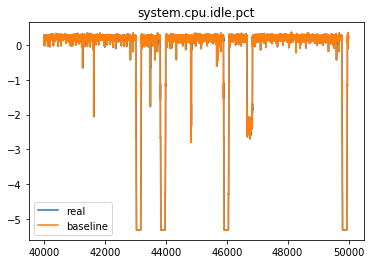

Mean Squared Error :  0.055647693712187876


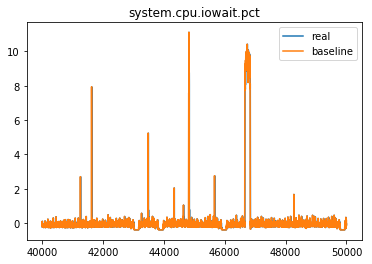

Mean Squared Error :  0.19036687377575917


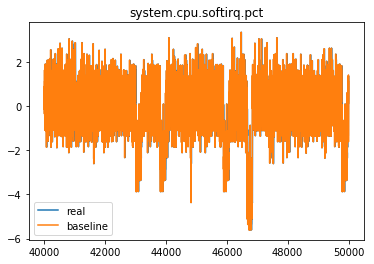

Mean Squared Error :  1.2200147404267485


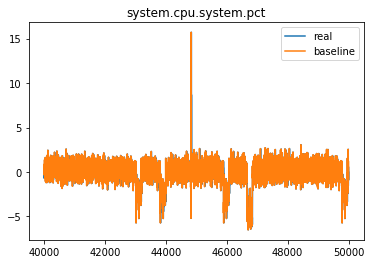

Mean Squared Error :  0.8988727400085303


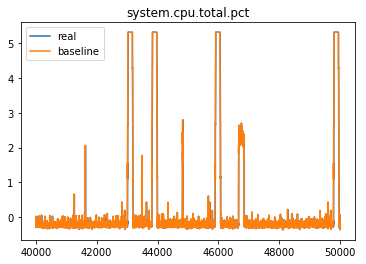

Mean Squared Error :  0.05564769371218788


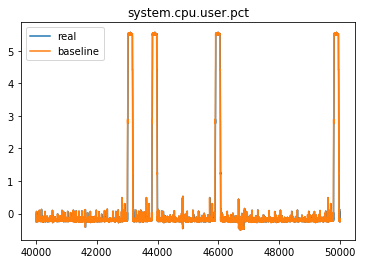

Mean Squared Error :  0.04261685769401566


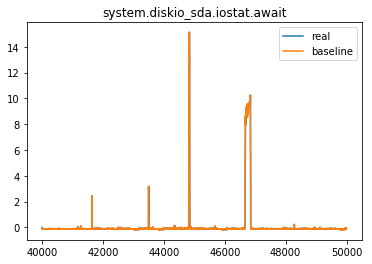

Mean Squared Error :  0.2518971510861575


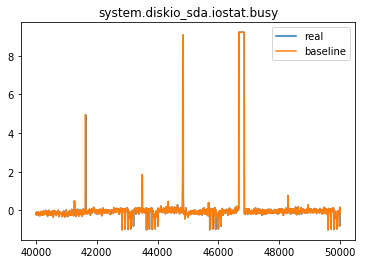

Mean Squared Error :  0.21136398782797572


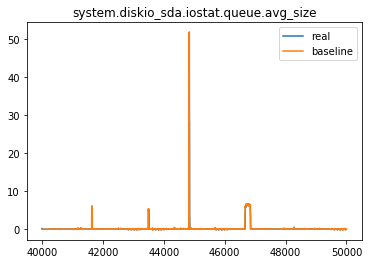

Mean Squared Error :  1.6340295001487144


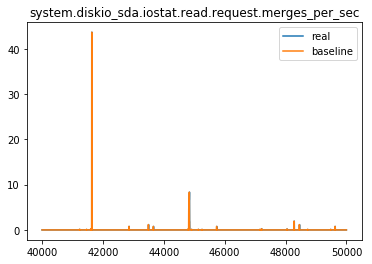

Mean Squared Error :  2.352539641175625


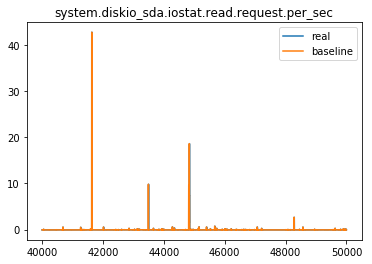

Mean Squared Error :  2.6902699642970256


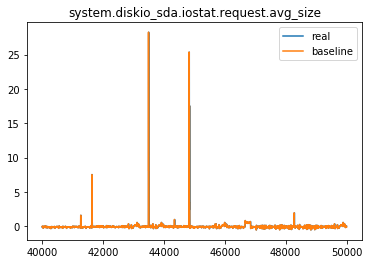

Mean Squared Error :  1.7074132435293936


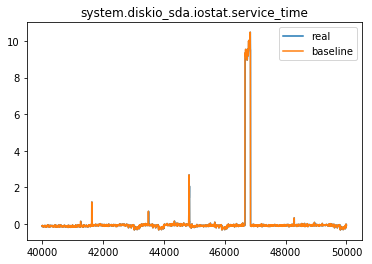

Mean Squared Error :  0.11921407455201094


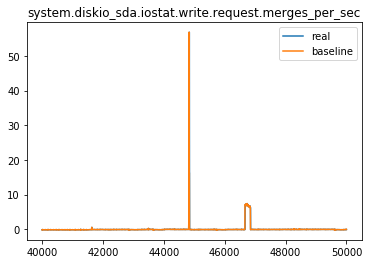

Mean Squared Error :  2.347196004380564


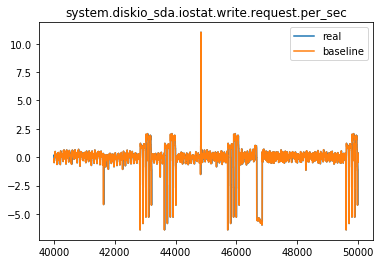

Mean Squared Error :  0.9505779603064974


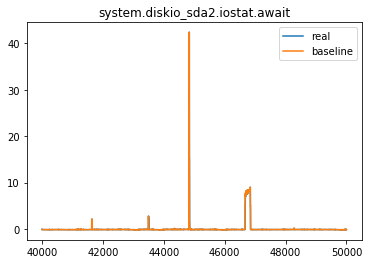

Mean Squared Error :  1.1816665398788877


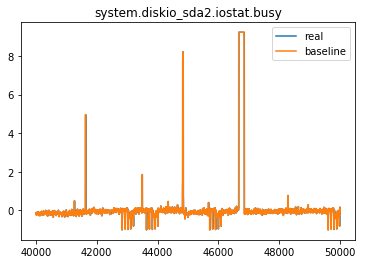

Mean Squared Error :  0.20639209773636416


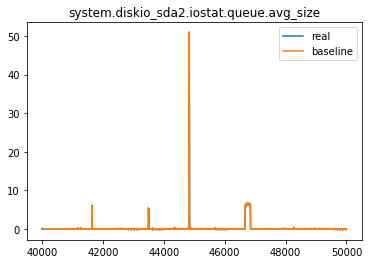

Mean Squared Error :  1.5861731113413093


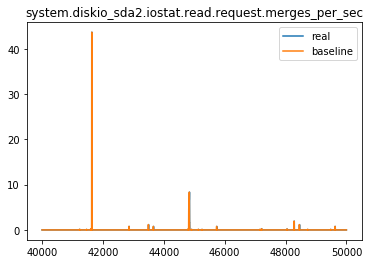

Mean Squared Error :  2.3575667564313796


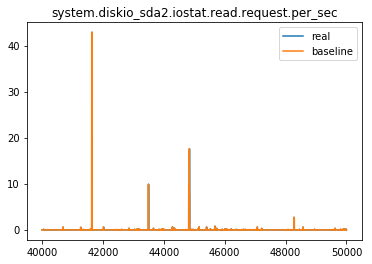

Mean Squared Error :  2.6694744779829995


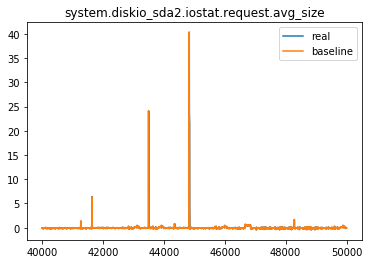

Mean Squared Error :  1.8038577336820136


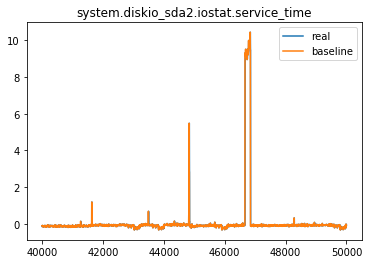

Mean Squared Error :  0.13117374387721084


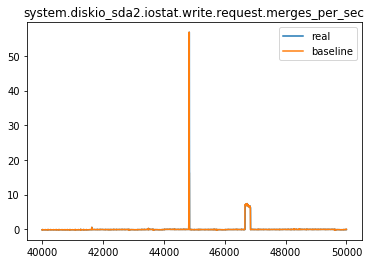

Mean Squared Error :  2.347196004380564


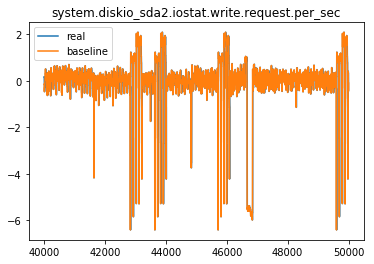

Mean Squared Error :  0.8217035190525178


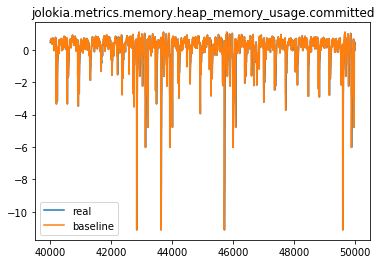

Mean Squared Error :  0.8830302419963689


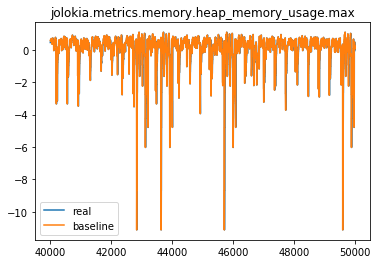

Mean Squared Error :  0.8830302419963689


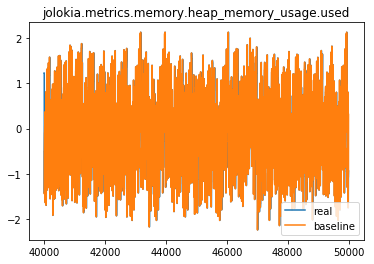

Mean Squared Error :  1.581545039301902


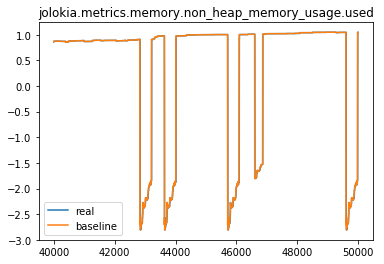

Mean Squared Error :  0.05939820946500774


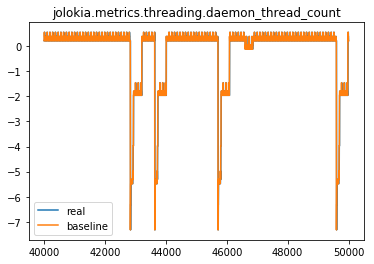

Mean Squared Error :  0.17703498261884085


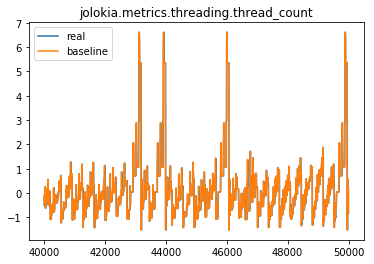

Mean Squared Error :  0.30494643005020927


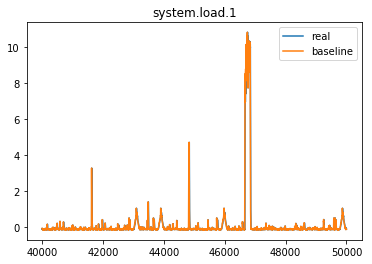

Mean Squared Error :  0.07058454757046144


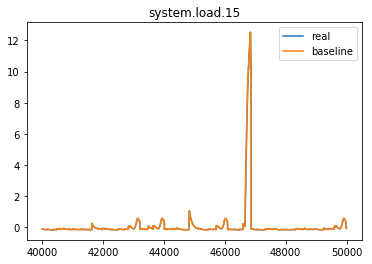

Mean Squared Error :  0.07092103486491577


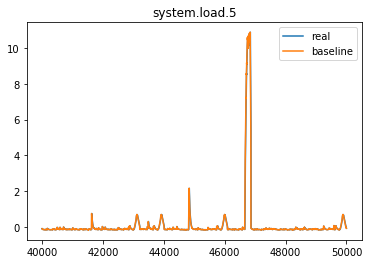

Mean Squared Error :  0.0345839860441064


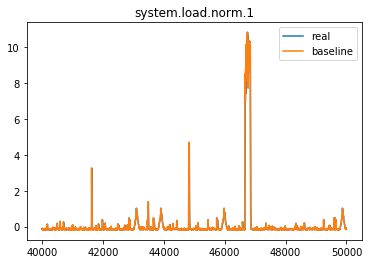

Mean Squared Error :  0.0705416676244743


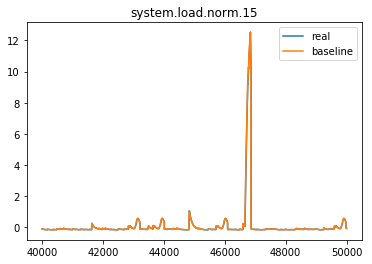

Mean Squared Error :  0.07092458833459539


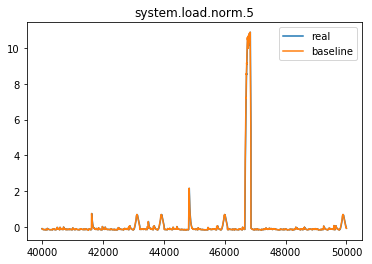

Mean Squared Error :  0.03457853093550368


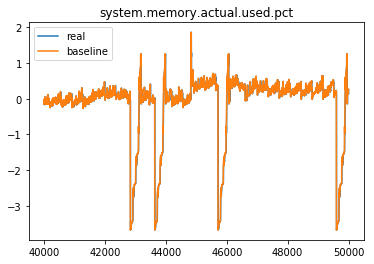

Mean Squared Error :  0.051400137640737156


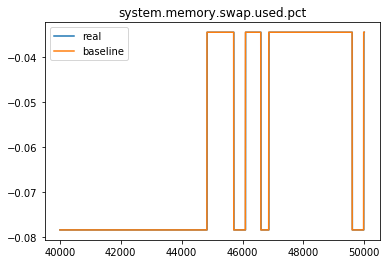

Mean Squared Error :  8.077674433762568e-06


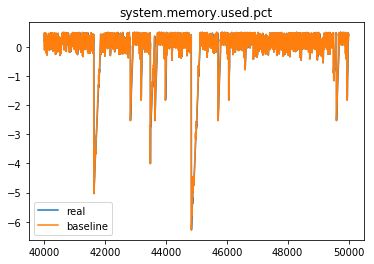

Mean Squared Error :  0.12039897700950404


In [18]:
f = pyplot.figure()
for i in range(test_dataset_shifted.shape[1]):
    pyplot.plot(test_dataset_shifted[test_dataset_shifted.columns[i]], label='real')
    pyplot.plot(test_dataset[test_dataset.columns[i]], label='baseline')
    pyplot.legend()
    pyplot.title(test_dataset_shifted.columns[i])
    pyplot.show()
    print("Mean Squared Error : ",mean_squared_error(test_dataset_shifted[test_dataset_shifted.columns[i]], test_dataset[test_dataset.columns[i]]))

## Saving Prediction

In [21]:
test_dataset.to_csv("test_data_baseline.csv")

In [22]:
test_dataset_shifted.to_csv("test_dataset_shifted_baseline.csv")